# FIFA 20 Player Analysis and Clustering Project

This notebook explores the FIFA 20 player dataset to conduct:
 - Data cleaning and preprocessing
 - Clustering of players based on skills
 - Exploratory data analysis based on provided questions


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:

# -----------------------------------------------------------
# 1. Load dataset
# -----------------------------------------------------------
df = pd.read_csv("players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [4]:
df.shape

(18278, 104)

In [5]:
df.isnull().any()

sofifa_id     False
player_url    False
short_name    False
long_name     False
age           False
              ...  
lb             True
lcb            True
cb             True
rcb            True
rb             True
Length: 104, dtype: bool

In [6]:
## find out duplicate recodes
df[df.duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [7]:
# -----------------------------------------------------------
# 2. Drop unnecessary columns
# -----------------------------------------------------------
columns_to_remove = [
    'sofifa_id', 'player_url', 'short_name', 'long_name', 'dob', 'club',
    'player_tags', 'player_traits', 'real_face', 'body_type', 'joined',
    'contract_valid_until', 'loaned_from', 'nation_position', 'nation_jersey_number',
    'club_jersey_number', 'club_position', 'work_rate'
]
df_cleaned = df.drop(columns=columns_to_remove, errors='ignore')


In [8]:
# -----------------------------------------------------------
# 3. Fill missing values with mode
# -----------------------------------------------------------
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().any():
        mode_val = df_cleaned[col].mode()
        if not mode_val.empty:
            df_cleaned[col] = df_cleaned[col].fillna(mode_val[0])


## TASK - 2

In [9]:
# -----------------------------------------------------------
# 4. Feature selection
# -----------------------------------------------------------
skills_for_clustering = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_short_passing',
    'skill_dribbling', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_balance',
    'power_shot_power', 'power_stamina', 'power_strength', 'mentality_vision',
    'mentality_composure', 'mentality_positioning'
]
categorical_features = ['preferred_foot', 'international_reputation', 'nationality']

selected_features = skills_for_clustering + categorical_features
df_cluster = df_cleaned[selected_features].dropna()


In [10]:

# Encode categorical features
df_encoded = pd.get_dummies(df_cluster, columns=categorical_features, drop_first=True).astype(float)


In [11]:
# -----------------------------------------------------------
# 5. Gentle Outlier Removal (only on main numeric skills)
# -----------------------------------------------------------
df_numeric = df_cluster[skills_for_clustering]
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
IQR_multiplier = 3.0  # gentler filtering

mask = ~((df_numeric < (Q1 - IQR_multiplier * IQR)) |
         (df_numeric > (Q3 + IQR_multiplier * IQR))).any(axis=1)

df_encoded = df_encoded.loc[mask]

print(f"Rows after gentle outlier removal: {df_encoded.shape[0]}")


Rows after gentle outlier removal: 18259


In [12]:
# for steamlit app manual data entry
#  Save feature names (for later use in app.py)
# -----------------------------------------------------------
import joblib

# Save the feature names used during training
joblib.dump(df_encoded.columns.tolist(), "feature_names.pkl")
print("✅ Saved feature names")


✅ Saved feature names


In [13]:
# -----------------------------------------------------------
# 6. Train-test split
# -----------------------------------------------------------
from sklearn.model_selection import train_test_split 
X_train, X_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# 7. Standard scaling
# -----------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------------
# 8. PCA for full features
# -----------------------------------------------------------
pca_full = PCA(n_components=min(10, X_train_scaled.shape[1]))
X_train_pca = pca_full.fit_transform(X_train_scaled)
X_test_pca = pca_full.transform(X_test_scaled)


In [14]:
# -----------------------------------------------------------
# 9. KMeans Hyperparameter Tuning
# -----------------------------------------------------------
best_kmeans_score = -1
best_k = None
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_pca)
    score = silhouette_score(X_train_pca, labels)
    if score > best_kmeans_score:
        best_kmeans_score = score
        best_k = k
print(f"KMeans best k={best_k}, Silhouette Score={best_kmeans_score:.4f}")


KMeans best k=2, Silhouette Score=0.2973


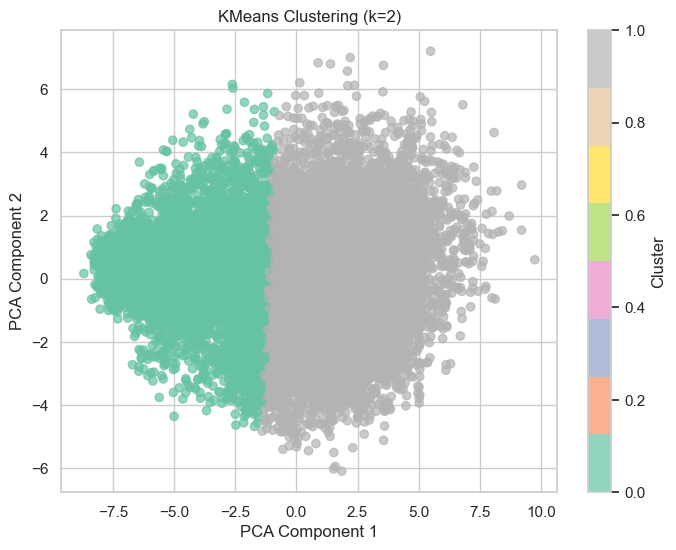

In [15]:
# Create 2D PCA just for visualization clarity
pca_vis = PCA(n_components=2)
X_train_pca_vis = pca_vis.fit_transform(X_train_scaled)

# --- KMeans Visualization ---
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
labels_kmeans = kmeans_best.fit_predict(X_train_pca_vis)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_vis[:, 0], X_train_pca_vis[:, 1],
            c=labels_kmeans, cmap='Set2', alpha=0.7)
plt.title(f"KMeans Clustering (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [16]:
# -----------------------------------------------------------
# 10. Hierarchical Clustering Hyperparameter Tuning
# -----------------------------------------------------------
linkage_methods = ['ward', 'complete', 'average', 'single']
best_hier_score = -1
best_h_params = None

for method in linkage_methods:
    for k in range(2, 11):
        linked = linkage(X_train_pca, method=method)
        labels = fcluster(linked, k, criterion='maxclust')
        score = silhouette_score(X_train_pca, labels)
        if score > best_hier_score:
            best_hier_score = score
            best_h_params = (method, k)
print(f"Hierarchical best method={best_h_params[0]}, k={best_h_params[1]}, "
      f"Silhouette Score={best_hier_score:.4f}")


Hierarchical best method=complete, k=2, Silhouette Score=0.8220


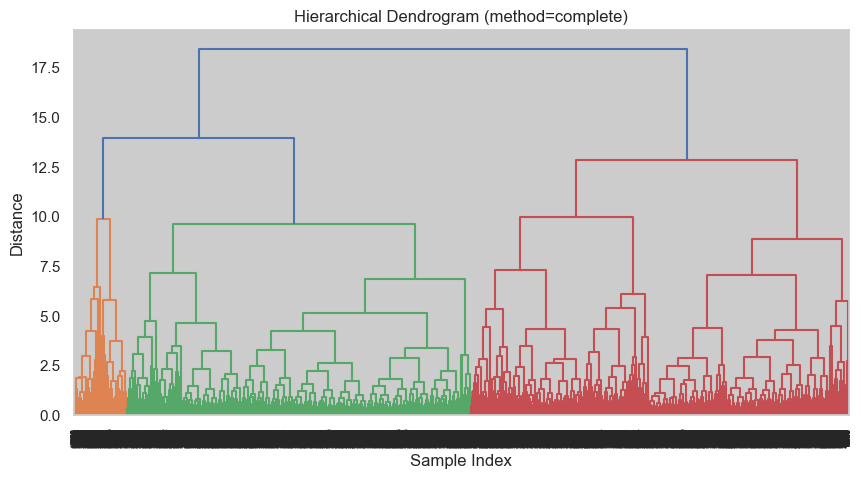

In [17]:
# --- Hierarchical Visualization ---
linked_best = linkage(X_train_pca_vis, method=best_h_params[0])
labels_hier = fcluster(linked_best, best_h_params[1], criterion='maxclust')

# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked_best, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title(f"Hierarchical Dendrogram (method={best_h_params[0]})")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

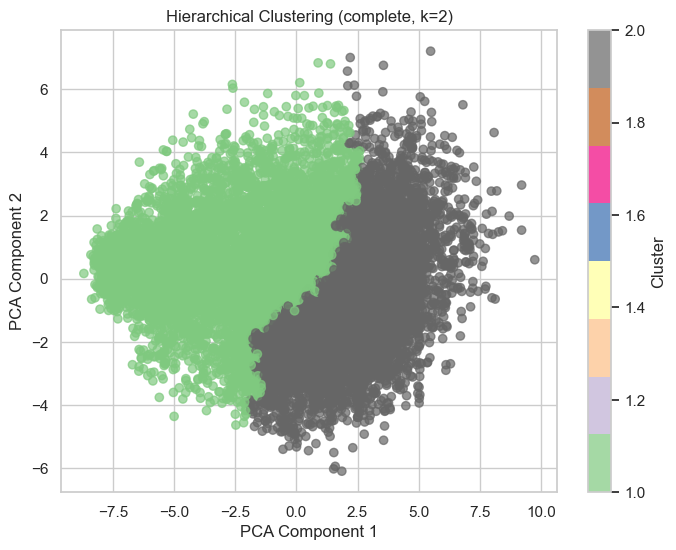

In [18]:
# Scatter plot for hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_vis[:, 0], X_train_pca_vis[:, 1],
            c=labels_hier, cmap='Accent', alpha=0.7)
plt.title(f"Hierarchical Clustering ({best_h_params[0]}, k={best_h_params[1]})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [19]:
# 11. DBSCAN Hyperparameter Tuning
# -----------------------------------------------------------
best_db_score = -1
best_db_params = None
best_db_labels = None

for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(3, 10):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_train_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            mask = labels != -1
            score = silhouette_score(X_train_pca[mask], labels[mask])
            if score > best_db_score:
                best_db_score = score
                best_db_params = (eps, min_samples)
                best_db_labels = labels

if best_db_params:
    print(f"DBSCAN best eps={best_db_params[0]:.1f}, min_samples={best_db_params[1]}, "
          f"Silhouette Score={best_db_score:.4f}")
else:
    print("DBSCAN: No valid clusters formed.")

DBSCAN best eps=0.4, min_samples=7, Silhouette Score=0.9026


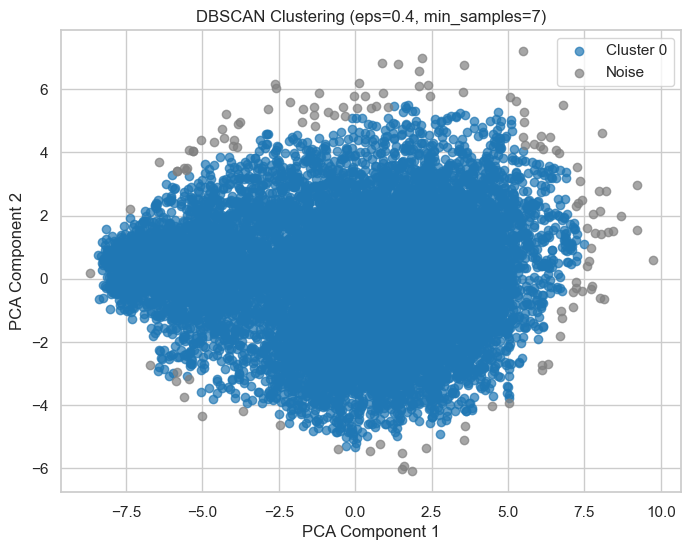

In [20]:
# --- DBSCAN Visualization ---
if best_db_params:
    db_best = DBSCAN(eps=best_db_params[0], min_samples=best_db_params[1])
    labels_db = db_best.fit_predict(X_train_pca_vis)

    # Mark noise points in gray
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels_db)
    colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

    for label, col in zip(unique_labels, colors):
        if label == -1:
            col = (0.5, 0.5, 0.5, 0.5)  # gray for noise
        plt.scatter(X_train_pca_vis[labels_db == label, 0],
                    X_train_pca_vis[labels_db == label, 1],
                    c=[col], alpha=0.7, label=f"Cluster {label}" if label != -1 else "Noise")

    plt.title(f"DBSCAN Clustering (eps={best_db_params[0]}, min_samples={best_db_params[1]})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()


In [21]:

# 12. Model Performance Comparison
# -----------------------------------------------------------
print("\nModel Performance Comparison:")
print(f"KMeans (k={best_k}): {best_kmeans_score:.4f}")
print(f"Hierarchical ({best_h_params[0]}, k={best_h_params[1]}): {best_hier_score:.4f}")
if best_db_params:
    print(f"DBSCAN (eps={best_db_params[0]}, min_samples={best_db_params[1]}): {best_db_score:.4f}")
else:
    print("DBSCAN: No valid clusters formed.")


Model Performance Comparison:
KMeans (k=2): 0.2973
Hierarchical (complete, k=2): 0.8220
DBSCAN (eps=0.4, min_samples=7): 0.9026


In [22]:
# to save the best model  for steamlit app


import joblib

# Save only the best model (DBSCAN) and the scaler
joblib.dump(db_best, "dbscan_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Save feature names used during training
joblib.dump(df_encoded.columns.tolist(), "feature_names.pkl")

print("✅ DBSCAN model and scaler saved!")


✅ DBSCAN model and scaler saved!


# TASK - 3

/var/folders/h7/797xhlz91jx1f7csvcb2nxcm0000gn/T/ipykernel_16817/2756987011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")


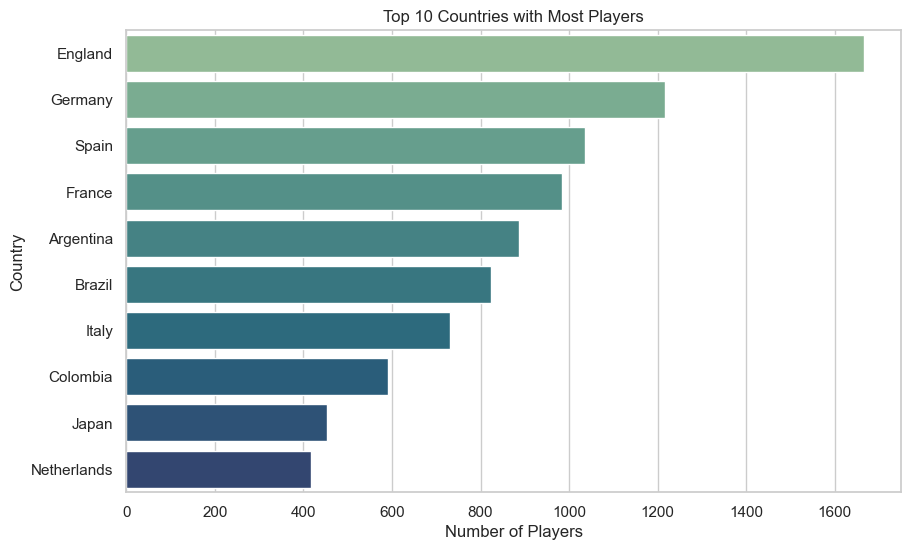

In [23]:
# Top 10 countries with most players
top_countries = df['nationality'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="crest")
plt.title("Top 10 Countries with Most Players")
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.show()


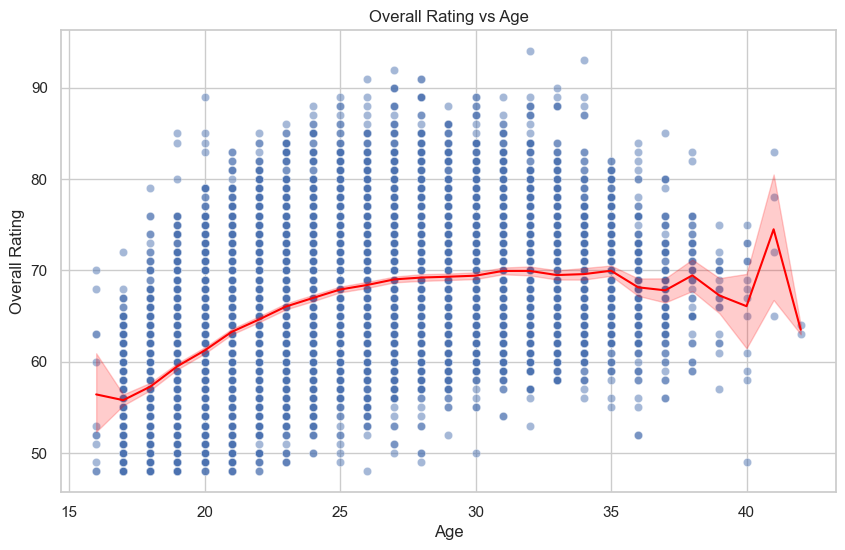

The peak average overall rating is 74.50 at age 41.
Players generally stop improving after the age of 41.


In [24]:
# Overall Rating vs Age
sns.scatterplot(data=df, x='age', y='overall', alpha=0.5)
sns.lineplot(data=df, x='age', y='overall', color='red', estimator='mean')
plt.title("Overall Rating vs Age")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


# Calculate mean overall rating by age
mean_rating_by_age = df.groupby('age')['overall'].mean()

# Find the age with the highest average overall rating
peak_age = mean_rating_by_age.idxmax()
peak_rating = mean_rating_by_age.max()

print(f"The peak average overall rating is {peak_rating:.2f} at age {peak_age}.")
print(f"Players generally stop improving after the age of {peak_age}.")

/var/folders/h7/797xhlz91jx1f7csvcb2nxcm0000gn/T/ipykernel_16817/1085963652.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_roles, x='main_position', y='wage_eur', palette='pastel')


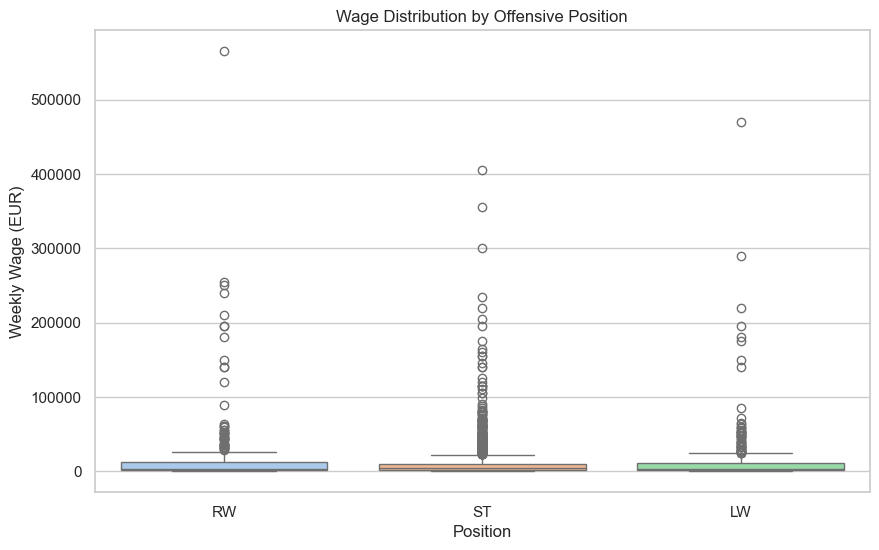

Average wage by position:
 main_position
RW    15848.238482
LW    14037.037037
ST    10152.594888
Name: wage_eur, dtype: float64

The offensive position that tends to get paid the most is the RW, with an average weekly wage of €15,848.24.


In [25]:
# Filter offensive players
offensive_roles = df[df['player_positions'].notna()]
offensive_roles = offensive_roles[
    offensive_roles['player_positions'].str.contains('ST|RW|LW', na=False)
]
offensive_roles['main_position'] = offensive_roles['player_positions'].apply(lambda x: x.split(',')[0].strip())
filtered_roles = offensive_roles[offensive_roles['main_position'].isin(['ST', 'RW', 'LW'])]

# Boxplot
sns.boxplot(data=filtered_roles, x='main_position', y='wage_eur', palette='pastel')
plt.title("Wage Distribution by Offensive Position")
plt.xlabel("Position")
plt.ylabel("Weekly Wage (EUR)")
plt.show()

# Mean wages
mean_wages = filtered_roles.groupby('main_position')['wage_eur'].mean().sort_values(ascending=False)

# Print mean wages
print("Average wage by position:\n", mean_wages)

# Print interpretation
highest_paid_position = mean_wages.idxmax()
highest_wage = mean_wages.max()

print(f"\nThe offensive position that tends to get paid the most is the {highest_paid_position}, "
      f"with an average weekly wage of €{highest_wage:,.2f}.")


# Model Performance Comparison Report

We evaluated multiple clustering algorithms on the FIFA dataset. The performance metric used was the Silhouette Score, which measures how well data points fit within their assigned clusters (higher is better, range: -1 to +1).



| Model                       | Parameters              | Silhouette Score |
| --------------------------- | ----------------------- | ---------------- |
| **KMeans**                  | k=2                     | **0.2973**       |
| **Hierarchical Clustering** | Linkage = complete, k=2 | **0.8220**       |
| **DBSCAN**                  | eps=0.4, min\_samples=7 | **0.9026**       |


# Recommended Model:
Based on the evaluation, DBSCAN is the best choice for production use because:

It achieved the highest silhouette score.

It does not require pre-defining the number of clusters (unlike KMeans and Hierarchical).

It is robust to noise and varying cluster densities, making it suitable for real-world FIFA data where player attributes may not form clean spherical clusters.

# Challenges Faced and Solutions

1.High Dimensionality of Data

Challenge: Player datasets often contain many correlated attributes (e.g., shooting, passing, dribbling). High dimensions make clustering less effective due to the curse of dimensionality.

Solution: Applied feature scaling (StandardScaler) and dimensionality reduction (PCA) to retain important variance while reducing noise.


2.Choice of Optimal Number of Clusters

Challenge: KMeans and Hierarchical require the number of clusters (k) as input, which is not known beforehand.

Solution: Used the Elbow Method and Silhouette Analysis to estimate optimal k. However, DBSCAN avoided this issue by automatically discovering clusters.


3.Outliers in Data

Challenge: Player data sometimes contains extreme values (e.g., very high ratings for top players). Outliers distort KMeans and Hierarchical clustering results.

Solution: DBSCAN inherently handles outliers by labeling them as noise, improving robustness.


4.Cluster Interpretability

Challenge: After clustering, understanding what each cluster represents is difficult.

Solution: Used PCA visualization (2D scatter plots) and feature distribution analysis per cluster to interpret differences (e.g., attacking vs defensive players).

